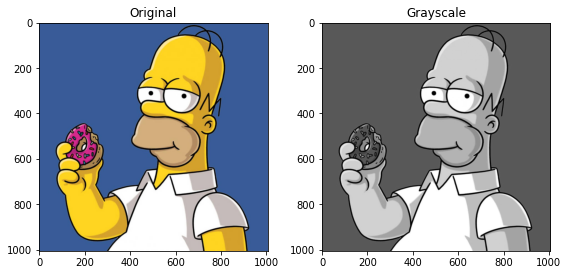

In [2]:
import matplotlib.pyplot as plt

from skimage import data,io,color
from skimage.color import rgb2gray

original = io.imread('homer.jpg')
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [20]:
import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 
mode = 0 #Считываем номер преобразования. 
image = Image.open("zoidberg.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

if (mode == 0):
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = (a + b + c) // 3
			draw.point((i, j), (S, S, S))

if (mode == 2):
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			draw.point((i, j), (255 - a, 255 - b, 255 - c))

if (mode == 5):
	factor = int(input('factor:'))
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = a + b + c
			if (S > (((255 + factor) // 2) * 3)):
				a, b, c = 255, 255, 255
			else:
				a, b, c = 0, 0, 0
			draw.point((i, j), (a, b, c))

image.save("black_zoidberg.jpg", "JPEG")


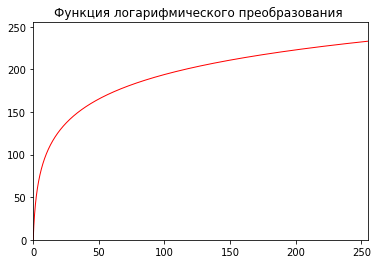

In [27]:
 # -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
 # Рисование кривой
def log_plot(c):
    x=np.arange(0,256,0.01)
    y=c*np.log(1+x)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция логарифмического преобразования ')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

 # Логарифмическое преобразование
def log(c,img):
    output=c*np.log(1.0+img)
    output=np.uint8(output+0.5)
    return output

# Прочитать исходное изображение
img=cv2.imread('black_zoidberg.jpg')

# Нарисуйте кривую логарифмического преобразования
log_plot(42)
 # Логарифмическое преобразование шкалы серого изображения
output=log(42,img)
30
# Показать изображение
cv2.imshow('Input',img)
cv2.imshow('Output',output)
cv2.waitKey(0)
cv2.destroyAllWindows()


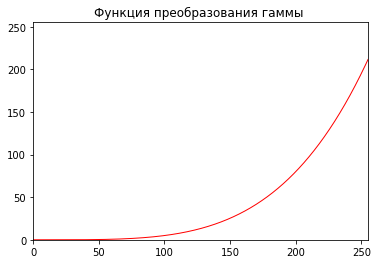

In [42]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Рисование кривой
def gamma_plot(c, v):
  x = np.arange(0, 256, 0.01)
  y = c*x**v
  plt.plot(x, y, 'r', linewidth=1)
  plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
  plt.title (u'Функция преобразования гаммы ')
  plt.xlim([0, 255]), plt.ylim([0, 255])
  plt.show()

 # Гамма преобразование
def gamma(img, c, v):
  lut = np.zeros(256, dtype=np.float32)
  for i in range(256):
    lut[i] = c * i ** v
  output_img = cv2.LUT (img, lut) # Отображение значения серого пикселя
  output_img = np.uint8(output_img+0.5)  
  return output_img

# Прочитать исходное изображение
img = cv2.imread('black_zoidberg.jpg')

  # Нарисуйте кривую гамма-преобразования
gamma_plot(0.00000005, 4.0)

  # Гамма-преобразование оттенков серого изображения
output = gamma(img, 0.9, 0.9)

# Показать изображение
cv2.imshow('Imput', img)
cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
import cv2

import numpy as np

  
# Функция для отображения каждого уровня интенсивности на выходной уровень интенсивности.

def pixelVal(pix, r1, s1, r2, s2):

    if (0 <= pix and pix <= r1):

        return (s1 / r1)*pix

    elif (r1 < pix and pix <= r2):

        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1

    else:

        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

  
# Откройте изображение.

img = cv2.imread('black_zoidberg.jpg')

  
# Определить параметры.

r1 = 70

s1 = 0

r2 = 140

s2 = 255

  
# Векторизовать функцию, чтобы применить ее к каждому значению в массиве Numpy.

pixelVal_vec = np.vectorize(pixelVal)

  
# Применить контрастное растяжение.

contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

  
# Сохранить отредактированное изображение.

cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

True

In [88]:
from PIL import Image
 
 
def crop_center(pil_img, crop_width: int, crop_height: int) -> Image:
    """
    Функция для обрезки изображения по центру.
    """
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
 
 
im = Image.open('black_zoidberg.jpg')
im_new = crop_center(im, 400, 400)
im_new.save('guido_crop_center.jpg', quality=95)